In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from sklearn.metrics import roc_curve, auc
from sklearn import metrics    
from sklearn import feature_selection
import itertools
from sklearn.model_selection import cross_val_score
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
#To check whether there is any missing value
df.isnull().sum() 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

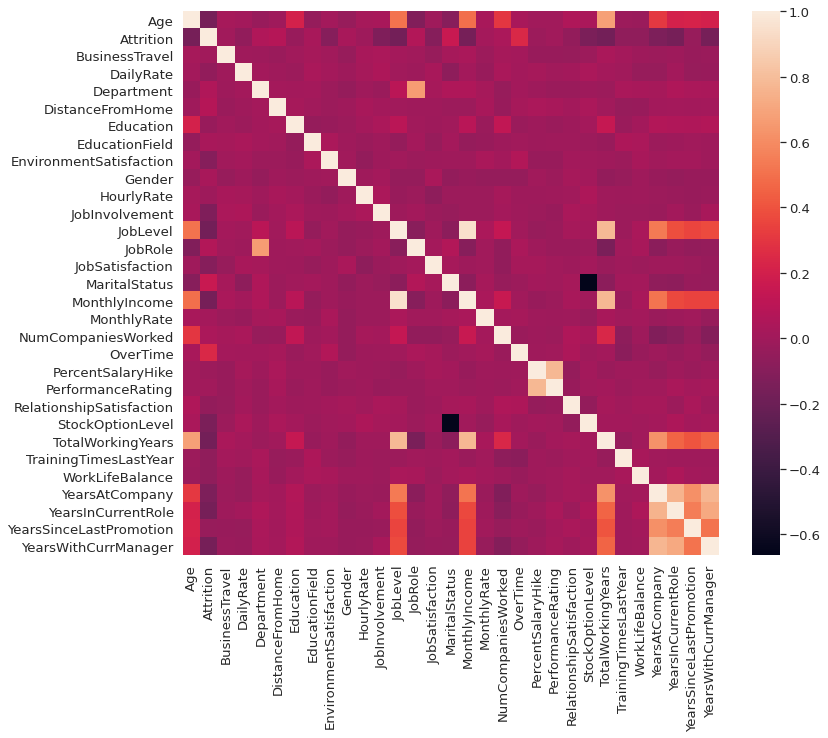

In [45]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)

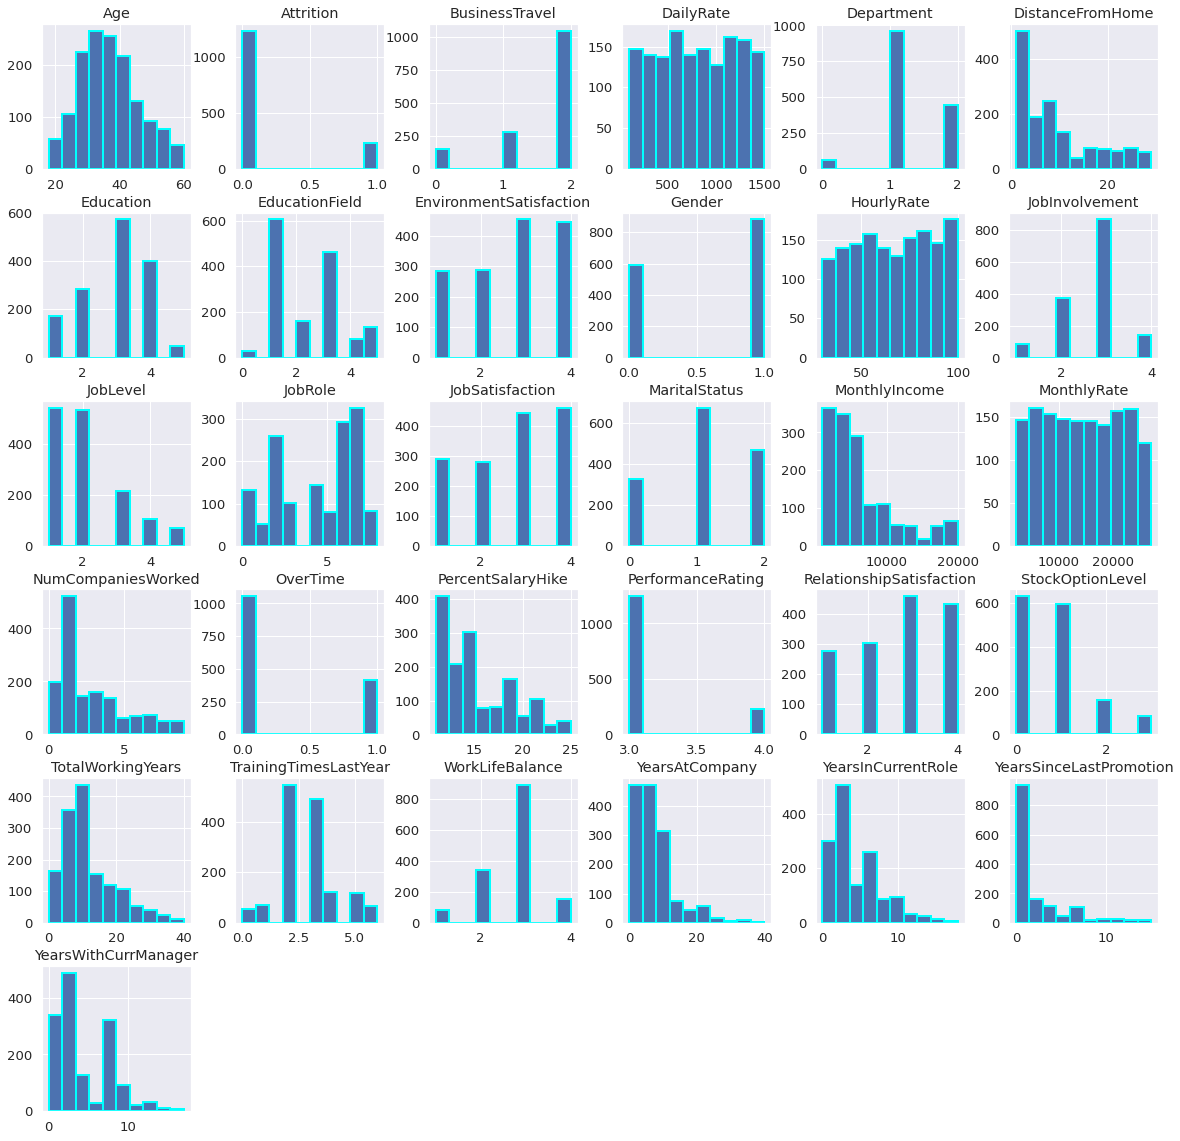

In [44]:
df.hist(edgecolor='cyan', linewidth=2, figsize=(20, 20));

In [0]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [11]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [0]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [0]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

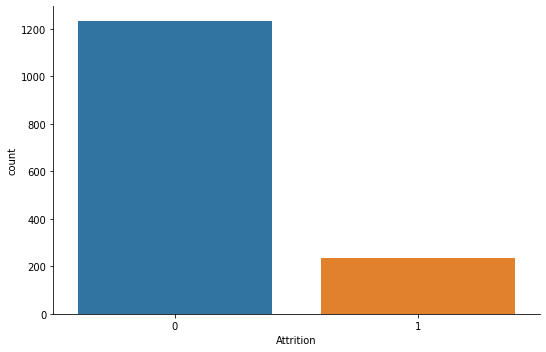

In [14]:
plot_cat('Attrition')

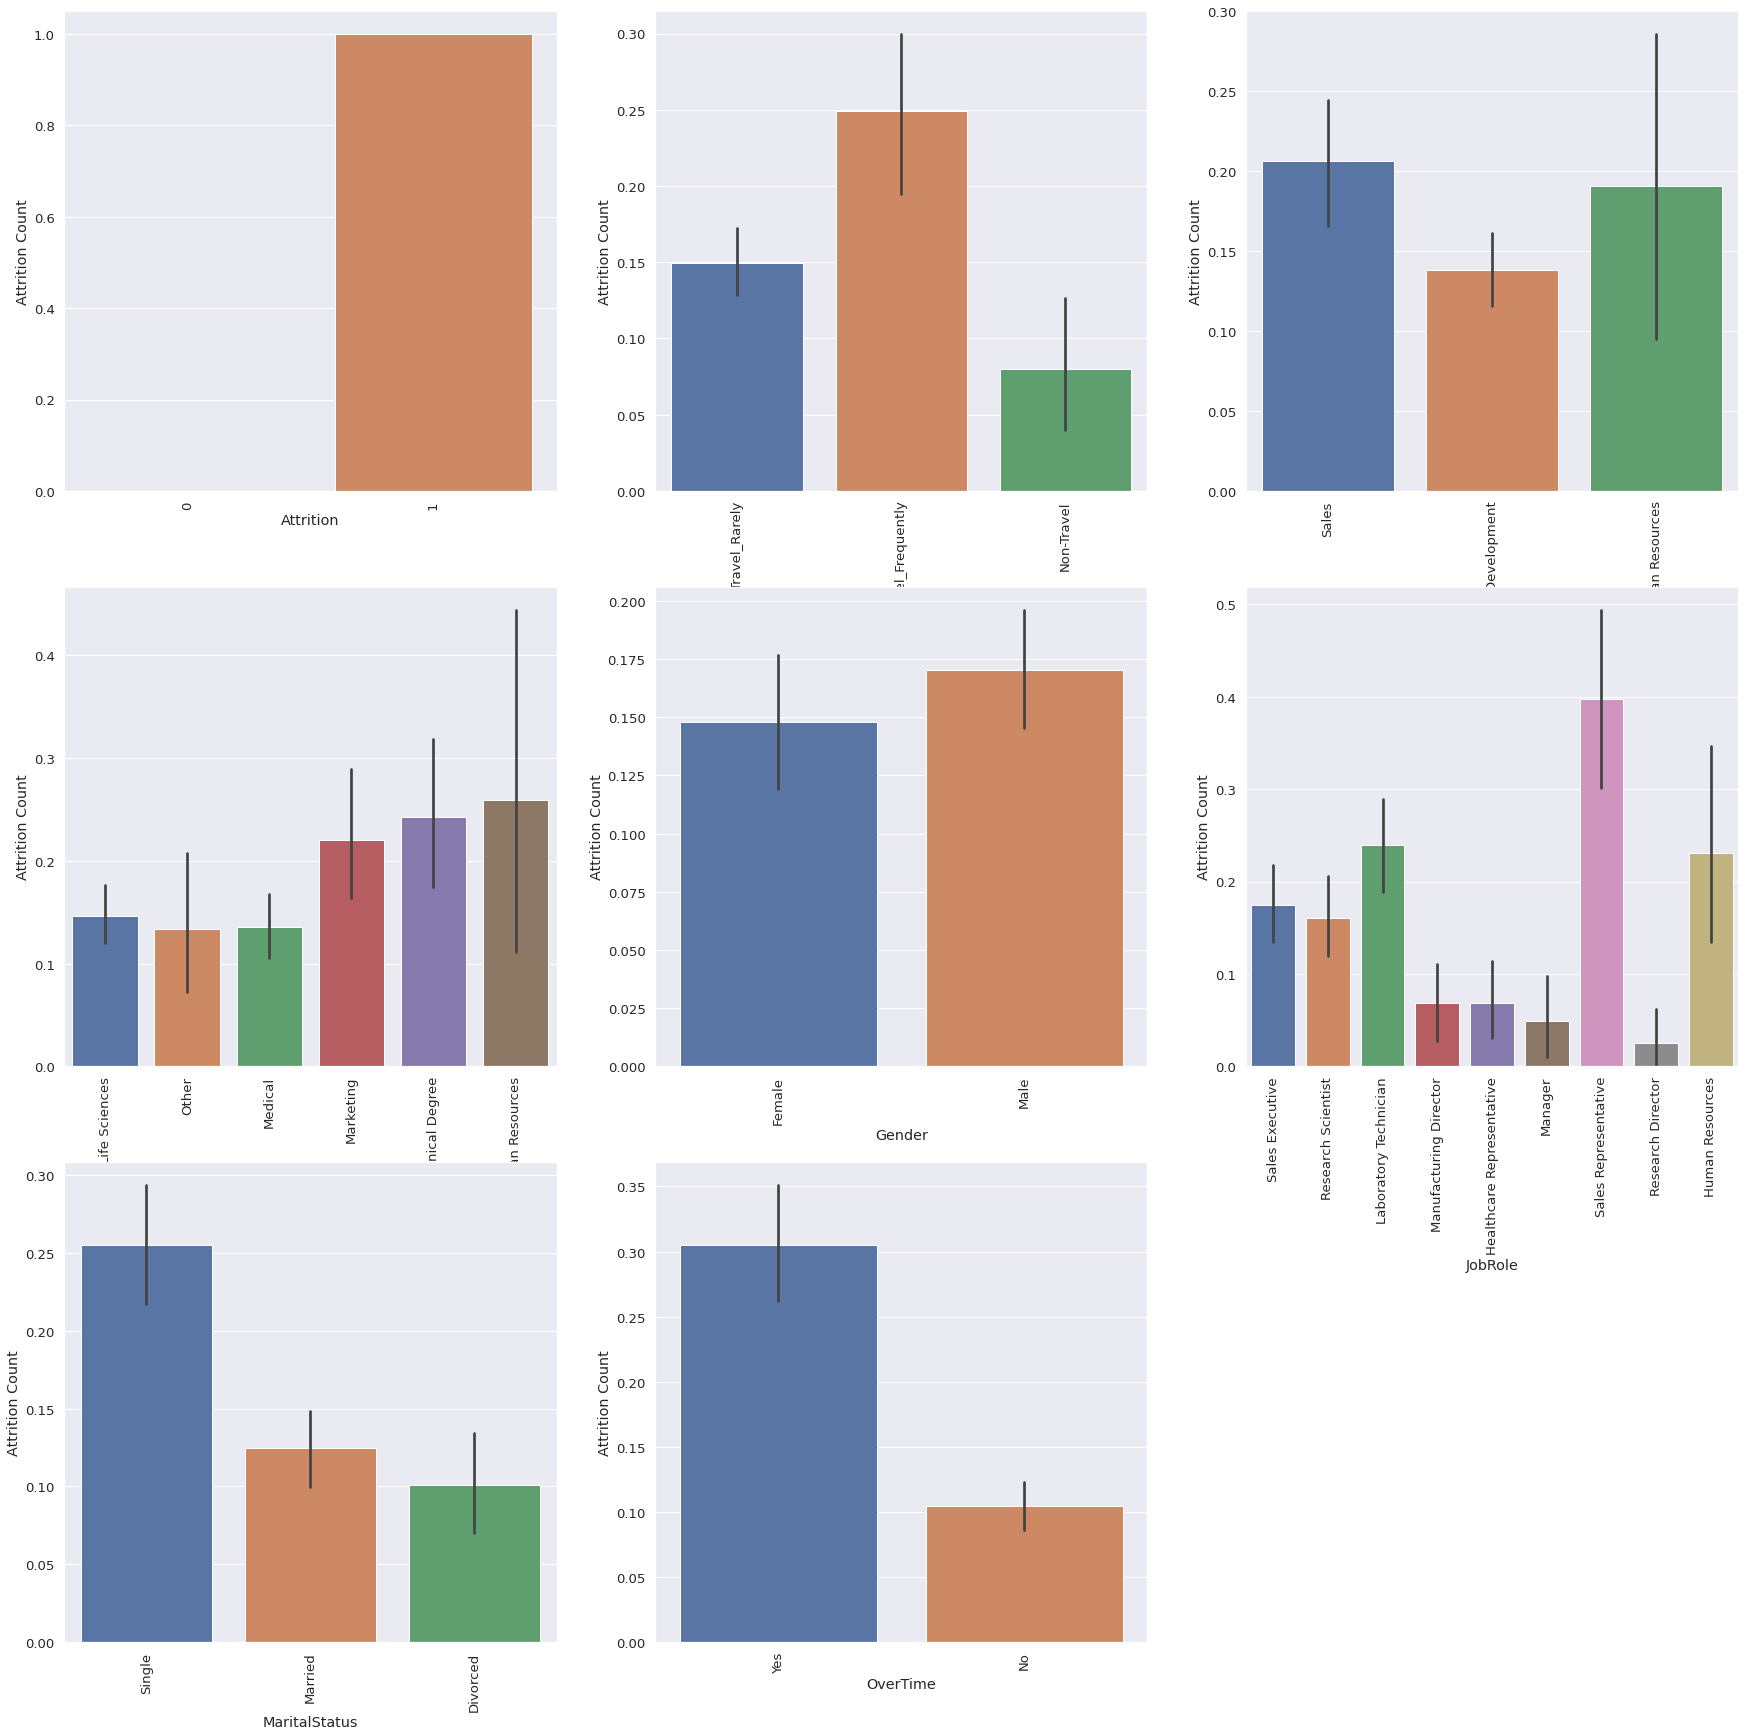

In [15]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')


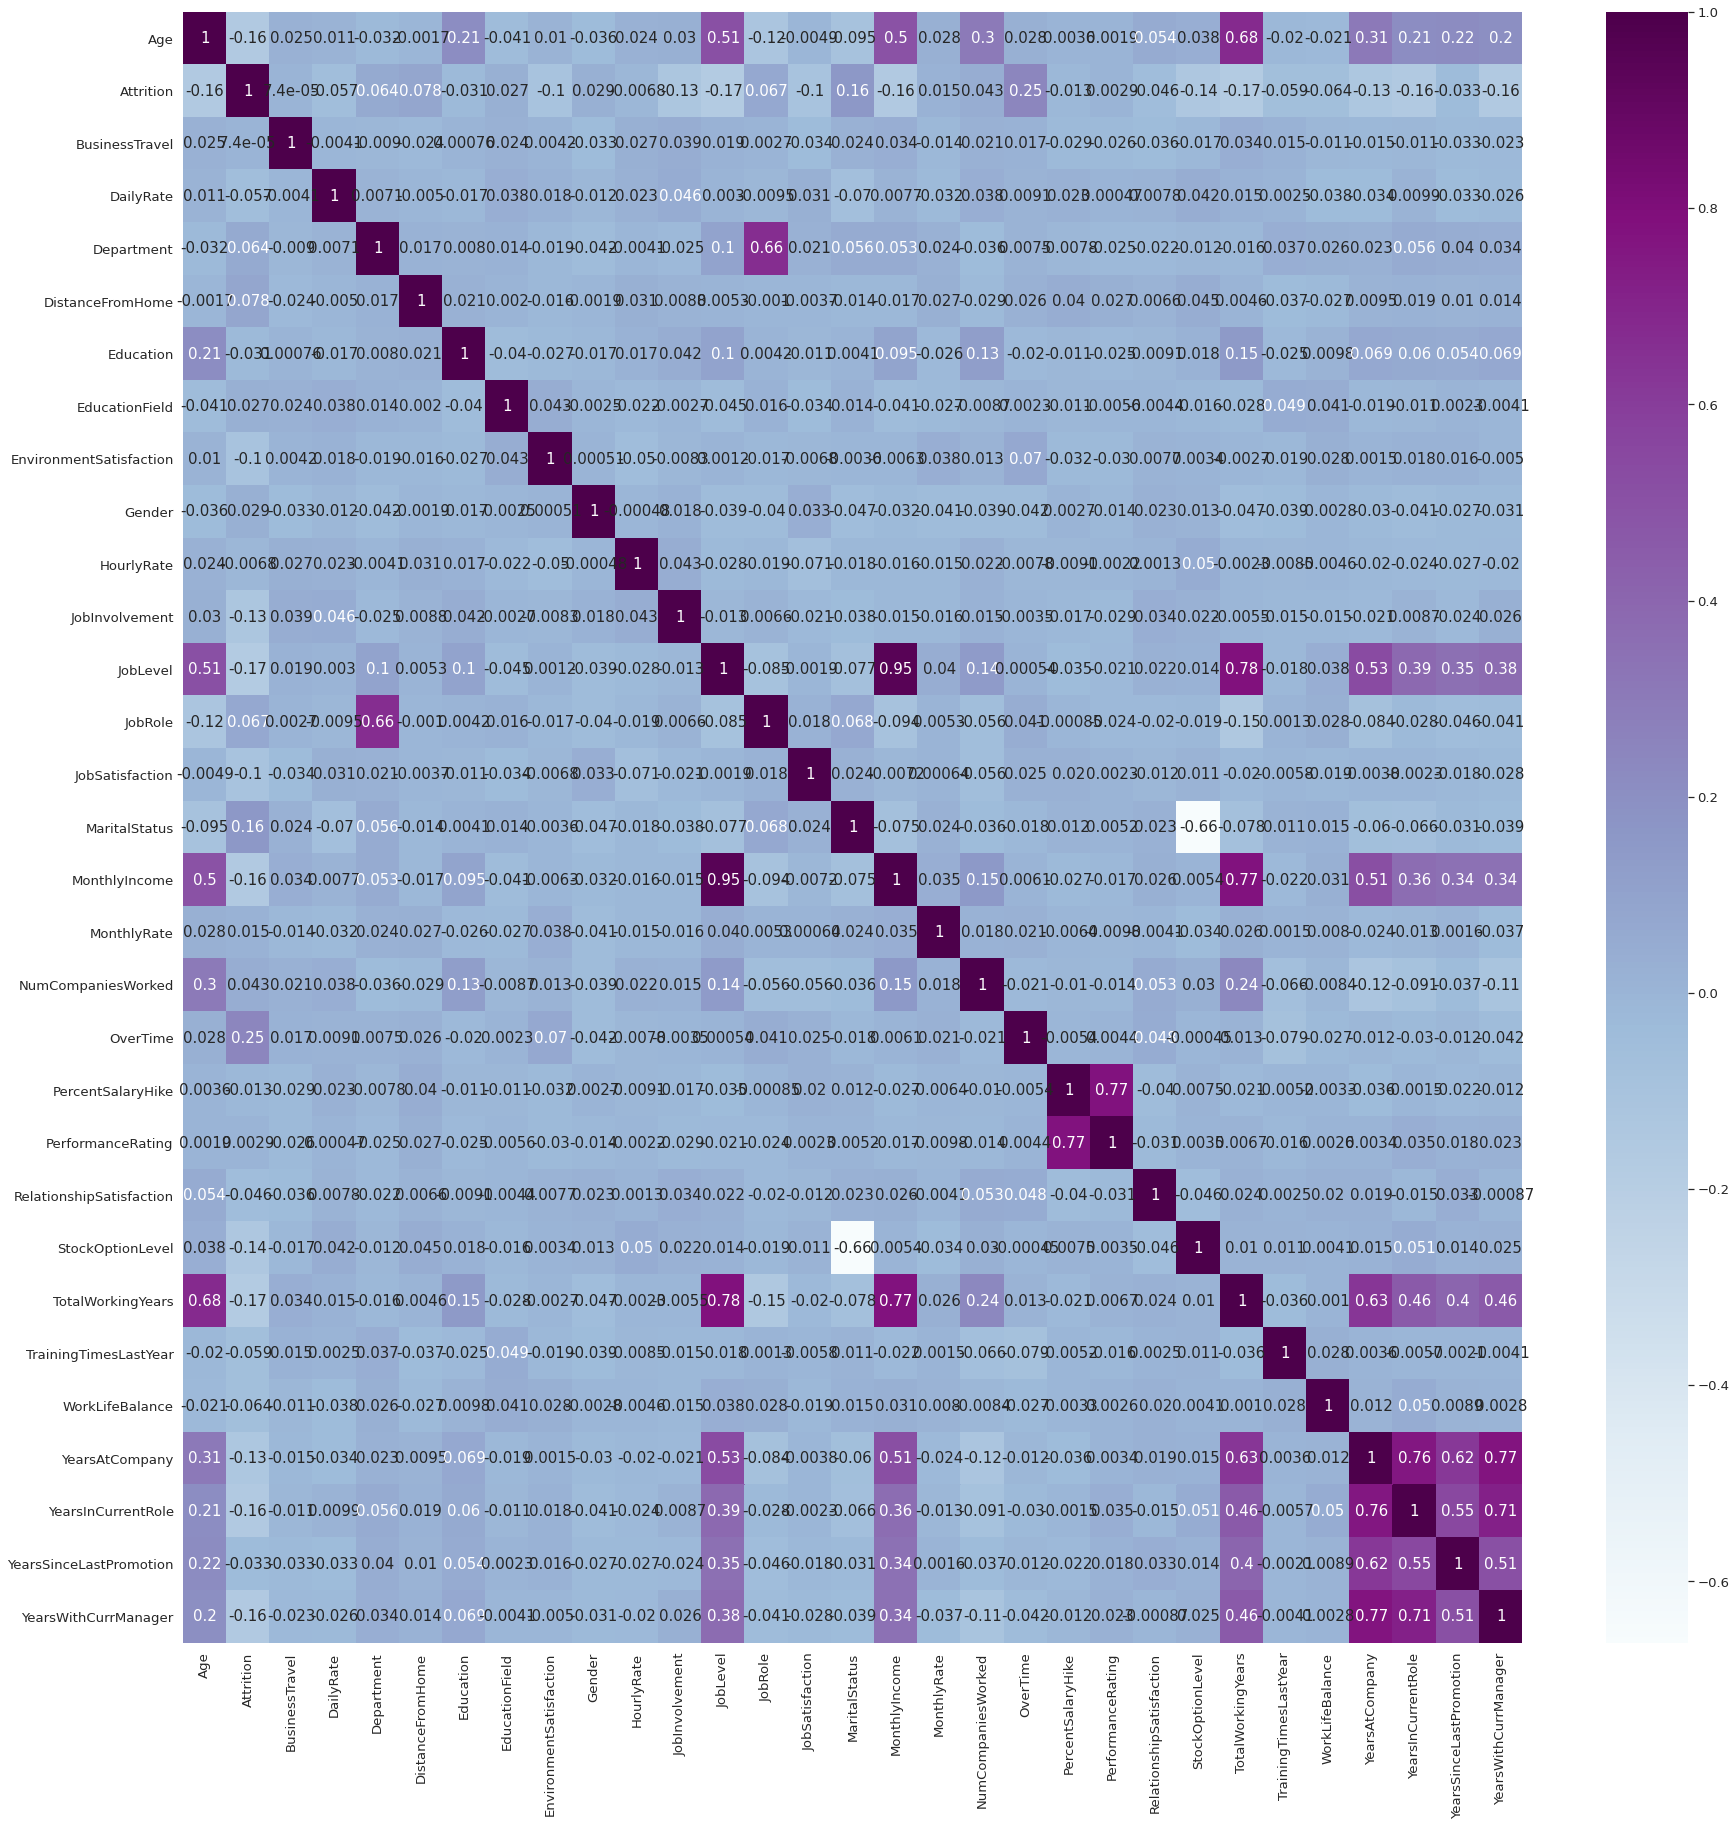

In [43]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="BuPu", annot_kws={"size":15})

In [0]:
categorical_col.remove('Attrition')

In [0]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [0]:
X = df.drop('Attrition', axis=1)
y = df.Attrition


In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X, y, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("\nTrain Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        train_accuracy.append(accuracy_score(y_train, pred))
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("\nTest Result:\n===========================================")   
        test_accuracy.append(accuracy_score(y_test, pred))     
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        scores = cross_val_score(clf, X, y, cv=10)
        cv_accuracy.append(scores.mean())
        cv_devia.append(scores.std()*2)
        print(f"10-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [0]:
def plot_ROC(model, X_test, y_test):  
  probs = model.predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)
  roc_accuracy.append(roc_auc)
  # method I: plt
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
train_accuracy = []
test_accuracy = []
cv_accuracy = []
cv_devia = []
roc_accuracy = []

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


model = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

In [0]:
tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [26]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [27]:
print_score(tree, X, y, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X, y, X_train, y_train, X_test, y_test, train=False)


Train Result:
accuracy score: 0.8848

Classification Report: 
 	Precision: 0.7348484848484849
	Recall Score: 0.5132275132275133
	F1 score: 0.6043613707165109

Confusion Matrix: 
 [[878  35]
 [ 92  97]]


Test Result:
accuracy score: 0.8342391304347826

Classification Report: 
 	Precision: 0.3142857142857143
	Recall Score: 0.22916666666666666
	F1 score: 0.26506024096385544

Confusion Matrix: 
 [[296  24]
 [ 37  11]]

10-fold Cross Validation Accuracy: 0.84 (+/- 0.03)


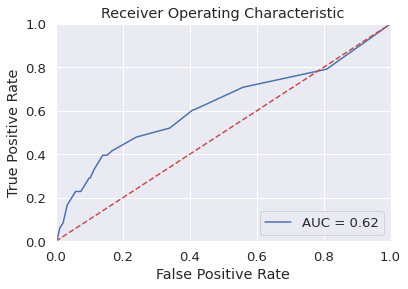

In [28]:
plot_ROC(tree,X_test,y_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


param_grid = {'max_depth':[50, 60, 75], 
              'n_estimators':[1400, 1425, 1450],
              'max_features':['sqrt'],
              'min_samples_split':[4, 5, 6], 
              'min_samples_leaf':[1], 
              'bootstrap':[ False], 
              'criterion':["gini"]}

rand_frst_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

grid_rand_forest = GridSearchCV(rand_frst_clf, param_grid, scoring="accuracy", 
                                n_jobs=-1, verbose=1, cv=5)

In [30]:
rand_forest = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)
# log_reg.fit(X_train,y_train)
rand_forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    3.7s finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [31]:
print_score(rand_forest, X, y, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X, y, X_train, y_train, X_test, y_test, train=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0



[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.2s finished


Confusion Matrix: 
 [[913   0]
 [  0 189]]


Test Result:
accuracy score: 0.8722826086956522

Classification Report: 
 	Precision: 0.5555555555555556
	Recall Score: 0.10416666666666667
	F1 score: 0.1754385964912281

Confusion Matrix: 
 [[316   4]
 [ 43   5]]



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

10-fold Cross Validation Accuracy: 0.86 (+/- 0.03)


[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.1s finished


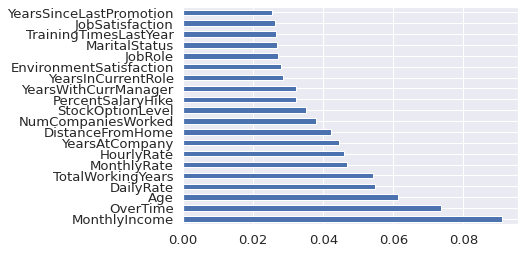

In [32]:
feat_importances = pd.Series(rand_forest.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1400 out of 1400 | elapsed:    0.2s finished


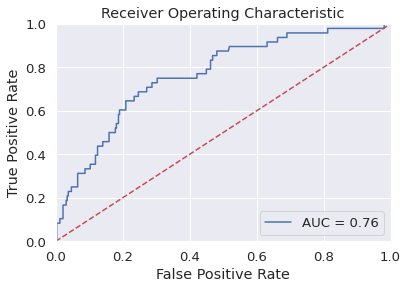

In [33]:
plot_ROC(rand_forest,X_test,y_test)

In [34]:
#Logistic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
log_reg = GridSearchCV(clf, param_grid = grid_values, scoring="accuracy", refit=True, cv=5, verbose=1)
log_reg.fit(X_train, y_train)
print(log_reg.best_estimator_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression(C=25, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.3s finished


In [35]:
log_reg = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

log_reg.fit(X_train,y_train)
print_score(log_reg, X, y, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X, y, X_train, y_train, X_test, y_test, train=False)


Train Result:
accuracy score: 0.8312

Classification Report: 
 	Precision: 0.7142857142857143
	Recall Score: 0.026455026455026454
	F1 score: 0.051020408163265314

Confusion Matrix: 
 [[911   2]
 [184   5]]


Test Result:
accuracy score: 0.8722826086956522

Classification Report: 
 	Precision: 1.0
	Recall Score: 0.020833333333333332
	F1 score: 0.04081632653061225

Confusion Matrix: 
 [[320   0]
 [ 47   1]]

10-fold Cross Validation Accuracy: 0.84 (+/- 0.01)


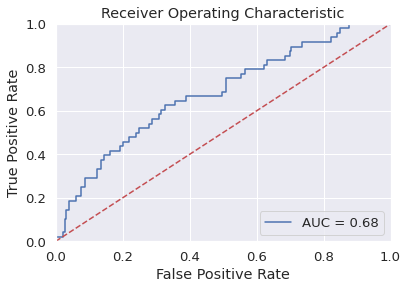

In [36]:
plot_ROC(log_reg,X_test,y_test)

In [37]:
#SVMs
from sklearn import svm
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

SVM = GridSearchCV(svm.SVC(), param_grid, scoring="accuracy", refit = True, cv=3, verbose = 1) 
SVM.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    4.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [38]:
print(SVM.best_estimator_)
best = SVM.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [39]:
SVM=svm.SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
SVM.fit(X_train,y_train)
print_score(SVM, X, y, X_train, y_train, X_test, y_test, train=True)
print_score(SVM, X, y, X_train, y_train, X_test, y_test, train=False)


Train Result:
accuracy score: 1.0000

Classification Report: 
 	Precision: 1.0
	Recall Score: 1.0
	F1 score: 1.0

Confusion Matrix: 
 [[913   0]
 [  0 189]]


Test Result:
accuracy score: 0.8695652173913043

Classification Report: 
 	Precision: 0.0
	Recall Score: 0.0
	F1 score: 0.0

Confusion Matrix: 
 [[320   0]
 [ 48   0]]

10-fold Cross Validation Accuracy: 0.84 (+/- 0.01)


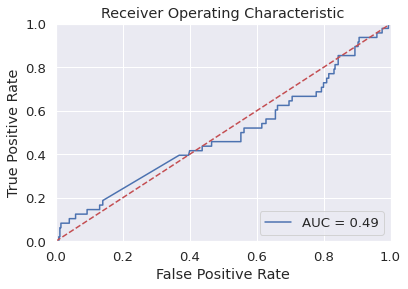

In [40]:
plot_ROC(SVM,X_test,y_test)

In [0]:
models = ['Decision Tree', 'Random Forest', 'Logistic Regression' , 'SVM' ]

In [42]:
results = pd.DataFrame({"10-fold Cross Validation":cv_accuracy[0:4], "Std Deviation(+/-)":cv_devia[0:4], "Roc score" : roc_accuracy[0:4], "Test Accuracy" : test_accuracy[0:4] , "Train Accuracy" : train_accuracy[0:4]} , index = models)
results

,10-fold Cross Validation,Std Deviation(+/-),Roc score,Test Accuracy,Train Accuracy
Decision Tree,0.838776,0.034446,0.620215,0.834239,0.884755
Random Forest,0.859864,0.027347,0.764486,0.872283,1.000000
Logistic Regression,0.839456,0.010884,0.678711,0.872283,0.831216
SVM,0.839456,0.006665,0.488965,0.869565,1.000000
